## Optimize Genetic Algorithm for Solving Traveler Salesperson Problem in Python

### author: Yi Rong 

### date: 07/14/21

### ref: https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithmtutorial-for-python-6fe5d2b3ca35

1. Run the code with its default setting and report the answer

In [2]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

Create class to handle "cities"

In [3]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

Create a fitness function

In [4]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

Create our initial population

Route generator

In [5]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

Create first "population" (list of routes)

In [6]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

Create the genetic algorithm

Rank individuals

In [7]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

Create a selection function that will be used to make the list of parent routes

In [8]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

Create mating pool

In [9]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

Create a crossover function for two parents to create one child

In [10]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

Create function to run crossover over full mating pool

In [11]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

Create function to mutate a single route

In [12]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

Create function to run mutation over entire population

In [13]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

Put all steps together to create the next generation

In [14]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

Final step: create the genetic algorithm

In [15]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

Running the genetic algorithm

Create list of cities

In [16]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

Run the genetic algorithm

In [17]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Initial distance: 1992.2165065271524
Final distance: 819.7935703820748


[(11,3),
 (4,18),
 (23,94),
 (28,93),
 (48,122),
 (104,173),
 (99,180),
 (84,192),
 (5,182),
 (5,177),
 (36,173),
 (58,159),
 (56,125),
 (66,127),
 (80,113),
 (83,107),
 (93,110),
 (136,111),
 (175,100),
 (183,66),
 (183,41),
 (155,40),
 (146,23),
 (123,47),
 (53,51)]

Plot the progress

Note, this will win run a separate GA

In [18]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

Run the function with our assumptions to see how distance has improved in each generation

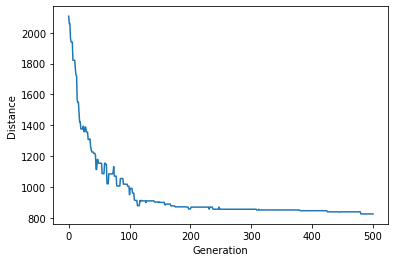

In [29]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

2. Mutation rate - Run the code with no mutation rate, and also mutation rate of 10%
and 20%, and the rest of the parameters as default. Comment on the impact of the
mutation on the results

mutation rate of 10%

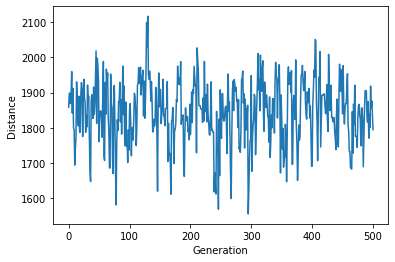

In [33]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.1, generations=500)

mutation rate of 20%

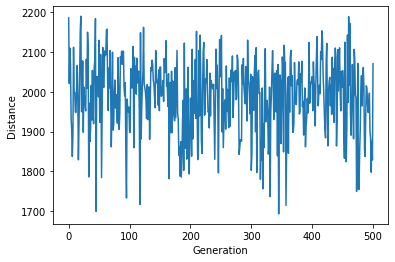

In [31]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.2, generations=500)

Comment: Since mutation will exchange two cities randomly, so it will cause more oscillation to the fitness result. It is obvious that the oscillation in 20% mutation is stronger than the 10 % mutation and is much stronger than the 1% mutation. Also, with high mutation rate, the result will be hard to converge to the best result. From the two results above, there is no trend for convergence.

3. Population – Run the code with population 10, 50, and 100 with the rest of the
parameters as default. Comment on the impact of population size on the results.

population 10

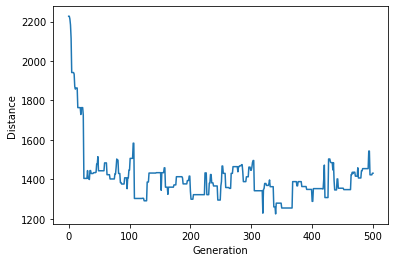

In [53]:
geneticAlgorithmPlot(population=cityList, popSize=10, eliteSize=5, mutationRate=0.01, generations=500)

population 20

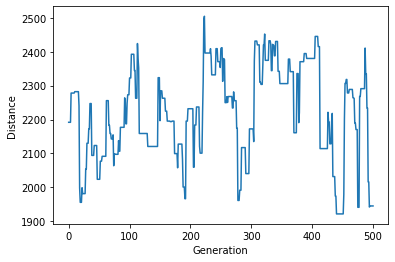

In [54]:
geneticAlgorithmPlot(population=cityList, popSize=20, eliteSize=20, mutationRate=0.01, generations=500)

population 100

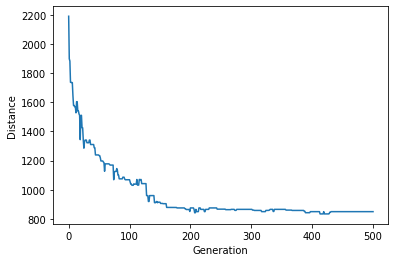

In [55]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Comment: eliteSize can not be set as default if popilation size is smaller, so I just set it as 5 when population is 10. Besides, it is very important to set a reasonable elite size, otherwise, we will have a non-converging result in the second figure, in which the two sizes are the same. If the elite sizes is reasonable, we will have a convergence trend, like figure 1 and 3. And it is obvious that larger population size will cause a smoother and better (less distance) convergence, which is shown in the third figure. However, convergence will take more time when the population size is larger. 

4. Elite size - Run the code with Elite size of 10, 20, and 40 with the rest of the
parameters as default. Comment on the impact of elite size on the results.

Elite size 10

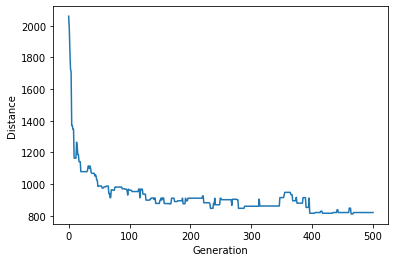

In [28]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=10, mutationRate=0.01, generations=500)

Elite size 20

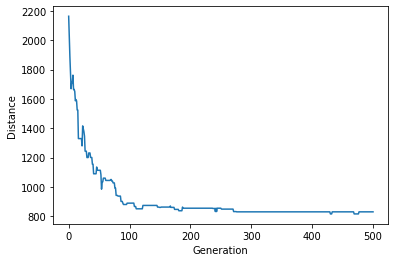

In [26]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)

Elite size 40

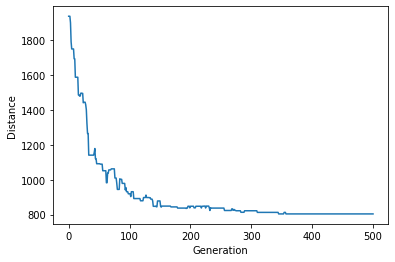

In [27]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=40, mutationRate=0.01, generations=500)

Comment: Elitism can bring the best solutions to the next generation, so it can make the convergence faster. However, increasing elite size will weaken the effect of elitism, which makes the convergence slower. From the results above, we can find that the fastest convergence is elite size 10 and the slowest one is elite size 40.

5. What would be your suggestion for the final settings of hyper-parameters of
genetic algorithm in this case, and why?

I would suggest to use 10 for elite size, because it makes the convergence fastest, and use 100 as population size because it will make best convergence, and use 0.01 as mutation rate because it will make less oscillation and convergence faster. 